# Final Year Project System (Loke Weng Khay - TP062166)
## Stroke Prediction System

### Import Libraries 

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from matplotlib import rcParams
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix

### Import Dataset 

In [2]:
df = pd.read_csv('C:\\Users\\vince\\Desktop\\FYP Testing\\Stroke\\healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data Exploration

#### General Overview of Dataset 

In [3]:
print("Shape of Stroke dataset:", df.shape)
print("Columns:", df.columns)

Shape of Stroke dataset: (5110, 12)
Columns: Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


#### Summary of Dataset 

In [4]:
print("Summary of Stroke dataset:")
df.info()

Summary of Stroke dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Check for Missing Data 

In [5]:
print("Missing Value from Stroke dataset:")
df.isna().sum()

Missing Value from Stroke dataset:


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

#### Standard Deviation of Dataset

In [6]:
import warnings
warnings.filterwarnings('ignore')
df.std(axis=0)

id                   21161.721625
age                     22.612647
hypertension             0.296607
heart_disease            0.226063
avg_glucose_level       45.283560
bmi                      7.854067
stroke                   0.215320
dtype: float64

### Data Pre-Processing 

####  Remove Unwanted Gender

In [7]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [8]:
df2=df[(df['gender']=='Male') | (df['gender']=='Female')]
del df2['id']
df2.gender.unique()

array(['Male', 'Female'], dtype=object)

#### Convert Non-Numerical Data to Numerical Data

In [9]:
df2['gender'] = df2['gender'].map(
    {'Female':1,'Male':0})

df2['ever_married'] = df2['ever_married'].map(
    {'Yes':1,'No':0})

df2['work_type'] = df2['work_type'].map(
    {'Never_worked':4,'children':3,'Govt_job':2,'Private':1,'Self-employed':0})

df2['Residence_type'] = df2['Residence_type'].map(
    {'Urban':1,'Rural':0})

df2['smoking_status'] = df2['smoking_status'].map(
                   {'Unknown':3,'formerly smoked':2,'smokes':1 ,'never smoked':0})


#### KNN Imputer for missing/null BMI variables 

In [10]:
imputer = KNNImputer(n_neighbors=5)
df2 = pd.DataFrame(imputer.fit_transform(df2),columns = df2.columns)

#### Cleaned Stroke Dataset

In [11]:
df2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.0,67.0,0.0,1.0,1.0,1.0,1.0,228.69,36.60,2.0,1.0
1,1.0,61.0,0.0,0.0,1.0,0.0,0.0,202.21,34.00,0.0,1.0
2,0.0,80.0,0.0,1.0,1.0,1.0,0.0,105.92,32.50,0.0,1.0
3,1.0,49.0,0.0,0.0,1.0,1.0,1.0,171.23,34.40,1.0,1.0
4,1.0,79.0,1.0,0.0,1.0,0.0,0.0,174.12,24.00,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,1.0,80.0,1.0,0.0,1.0,1.0,1.0,83.75,27.54,0.0,0.0
5105,1.0,81.0,0.0,0.0,1.0,0.0,1.0,125.20,40.00,0.0,0.0
5106,1.0,35.0,0.0,0.0,1.0,0.0,0.0,82.99,30.60,0.0,0.0
5107,0.0,51.0,0.0,0.0,1.0,1.0,0.0,166.29,25.60,2.0,0.0


### Data Visualization 

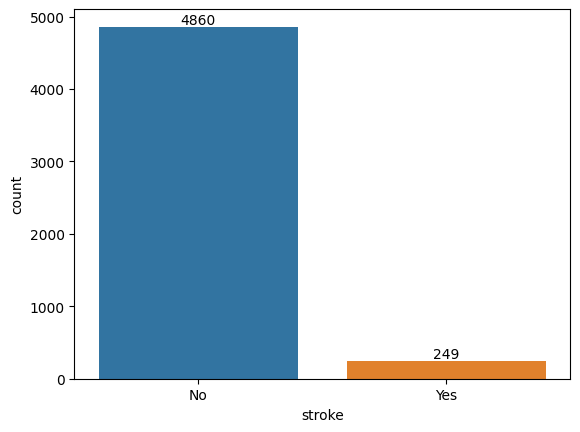

In [12]:
ax = sns.countplot(x='stroke', data=df2)
plt.gca().set_xticklabels(labels=["No","Yes"])
for container in ax.containers:
    ax.bar_label(container)

In [13]:
print(df2.stroke.value_counts())
print()
print(round(df2.stroke.value_counts(normalize=True),2)*100)

0.0    4860
1.0     249
Name: stroke, dtype: int64

0.0    95.0
1.0     5.0
Name: stroke, dtype: float64


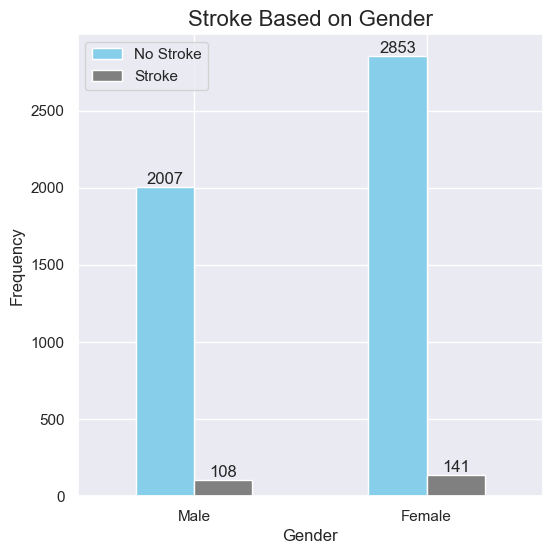

In [14]:
sns.set(style="darkgrid")
ax1 = pd.crosstab(df2.gender,df2.stroke)
bar1=ax1.plot(kind="bar",figsize=(6,6),color=['skyblue',"grey"])
plt.title('Stroke Based on Gender', fontsize=16)
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.gca().set_xticklabels(labels=["Male","Female"])
plt.xticks(rotation=0)
plt.legend(["No Stroke", "Stroke"])
for c in bar1.containers:
    # set the bar label
    bar1.bar_label(c, label_type='edge')
plt.show()

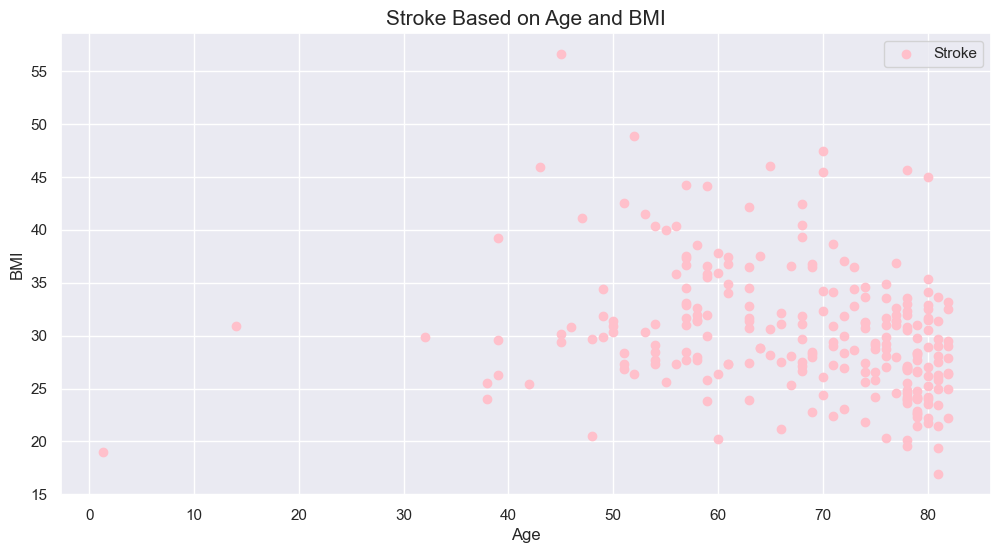

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))

plt.scatter(df2.age[df2.stroke==1], df2.bmi[df2.stroke==1],color='pink')
#plt.scatter(df.age[df.stroke==0], df.bmi[df.stroke==0],color='grey')

plt.title('Stroke Based on Age and BMI',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('BMI',fontsize=12)
plt.legend(['Stroke']);

<AxesSubplot: xlabel='age', ylabel='stroke'>

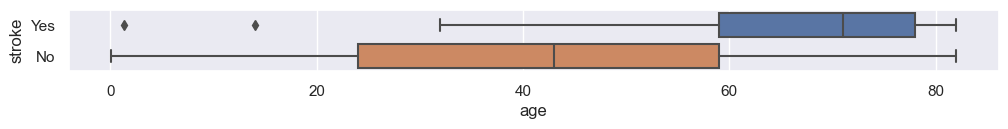

In [16]:
df3=df2[['age','stroke']]
df3['stroke'] = df3['stroke'].map(
                   {1:'Yes' ,0:'No'})
plt.figure(figsize=(12,0.8))
sns.boxplot(data=df3, x='age',y='stroke')

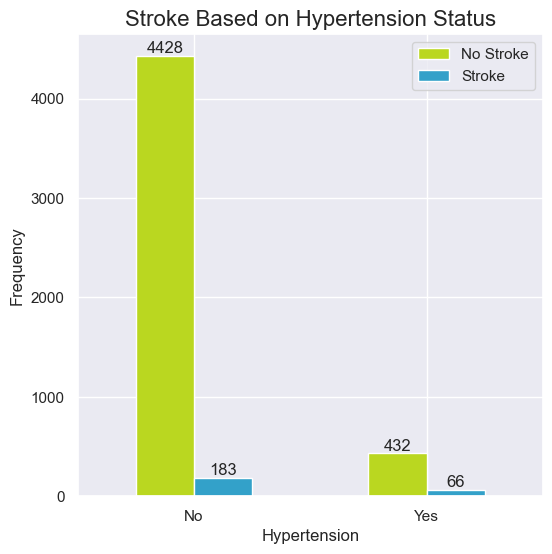

In [17]:
sns.set(style="darkgrid")
ax2 = pd.crosstab(df2.hypertension,df2.stroke)
bar2 = ax2.plot(kind="bar",figsize=(6,6),color=['#BAD720',"#33A1C9"])
plt.title('Stroke Based on Hypertension Status', fontsize=16)
plt.xlabel('Hypertension')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.legend(["No Stroke", "Stroke"])
for c in bar2.containers:
    # set the bar label
    bar2.bar_label(c, label_type='edge')
plt.show()

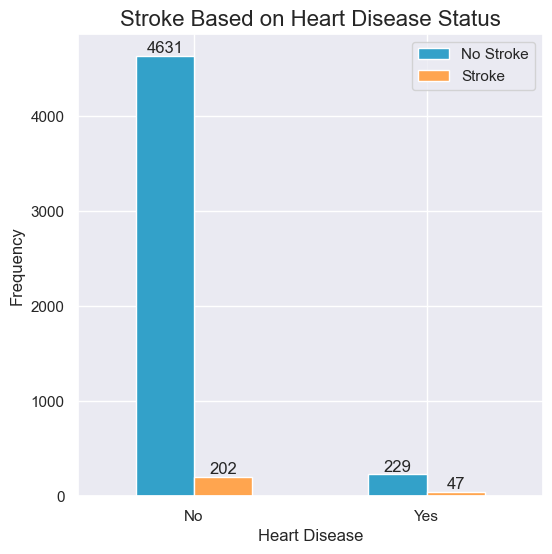

In [18]:
sns.set(style="darkgrid")
ax3 = pd.crosstab(df2.heart_disease,df2.stroke)
bar3 = ax3.plot(kind="bar",figsize=(6,6),color=["#33A1C9", "#FFA54F"])
plt.title('Stroke Based on Heart Disease Status', fontsize=16)
plt.xlabel('Heart Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.legend(["No Stroke", "Stroke"])
for c in bar3.containers:
    # set the bar label
    bar3.bar_label(c, label_type='edge')
plt.show()

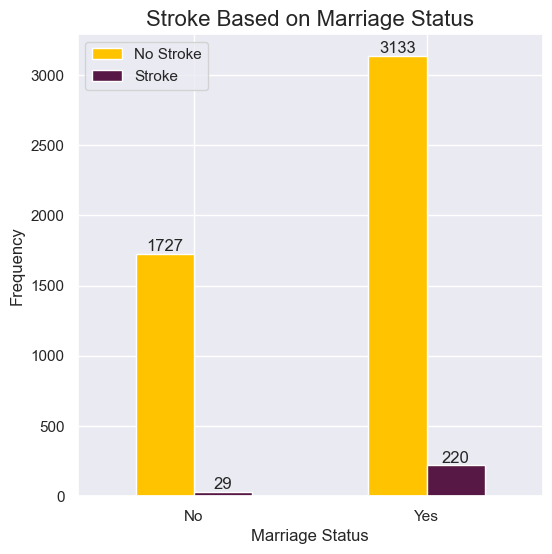

In [19]:
sns.set(style="darkgrid")
ax4 = pd.crosstab(df2.ever_married,df2.stroke)
bar4 = ax4.plot(kind="bar",figsize=(6,6),color=["#FFC300", "#581845"])
plt.title('Stroke Based on Marriage Status', fontsize=16)
plt.xlabel('Marriage Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["No","Yes"])
plt.legend(["No Stroke", "Stroke"])
for c in bar4.containers:
    # set the bar label
    bar4.bar_label(c, label_type='edge')
plt.show()

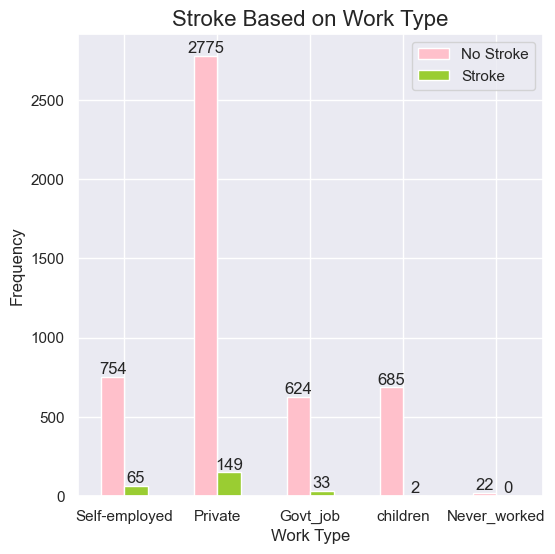

In [20]:
sns.set(style="darkgrid")
ax5 = pd.crosstab(df2.work_type,df2.stroke)
bar5 = ax5.plot(kind="bar",figsize=(6,6),color=['pink','yellowgreen'])
plt.title('Stroke Based on Work Type', fontsize=16)
plt.xlabel('Work Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Self-employed","Private","Govt_job","children","Never_worked"])
plt.legend(["No Stroke", "Stroke"])
for c in bar5.containers:
    # set the bar label
    bar5.bar_label(c, label_type='edge')
plt.show()

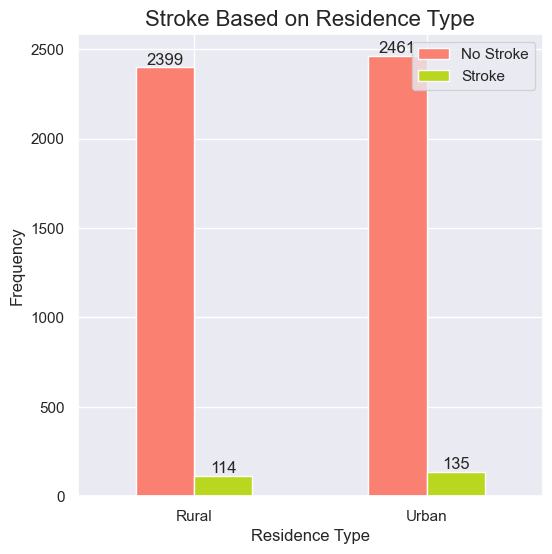

In [21]:
sns.set(style="darkgrid")
ax6 = pd.crosstab(df2.Residence_type,df2.stroke)
bar6 = ax6.plot(kind="bar",figsize=(6,6),color=['salmon',"#BAD720"])
plt.title('Stroke Based on Residence Type', fontsize=16)
plt.xlabel('Residence Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Rural","Urban"])
plt.legend(["No Stroke", "Stroke"])
for c in bar6.containers:
    # set the bar label
    bar6.bar_label(c, label_type='edge')
plt.show()

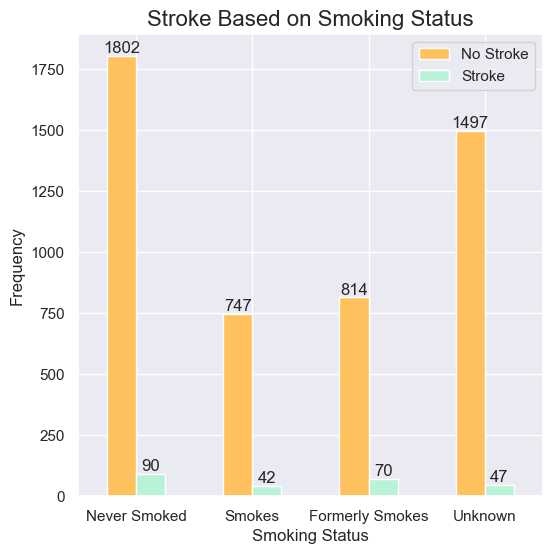

In [22]:
sns.set(style="darkgrid")
ax7 = pd.crosstab(df2.smoking_status,df2.stroke)
bar7 = ax7.plot(kind="bar",figsize=(6,6),color=['#FFC15E',"#BAF2D8"])
plt.title('Stroke Based on Smoking Status', fontsize=16)
plt.xlabel('Smoking Status')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Never Smoked","Smokes","Formerly Smokes","Unknown"])
plt.legend(["No Stroke", "Stroke"])
for c in bar7.containers:
    # set the bar label
    bar7.bar_label(c, label_type='edge')
plt.show()

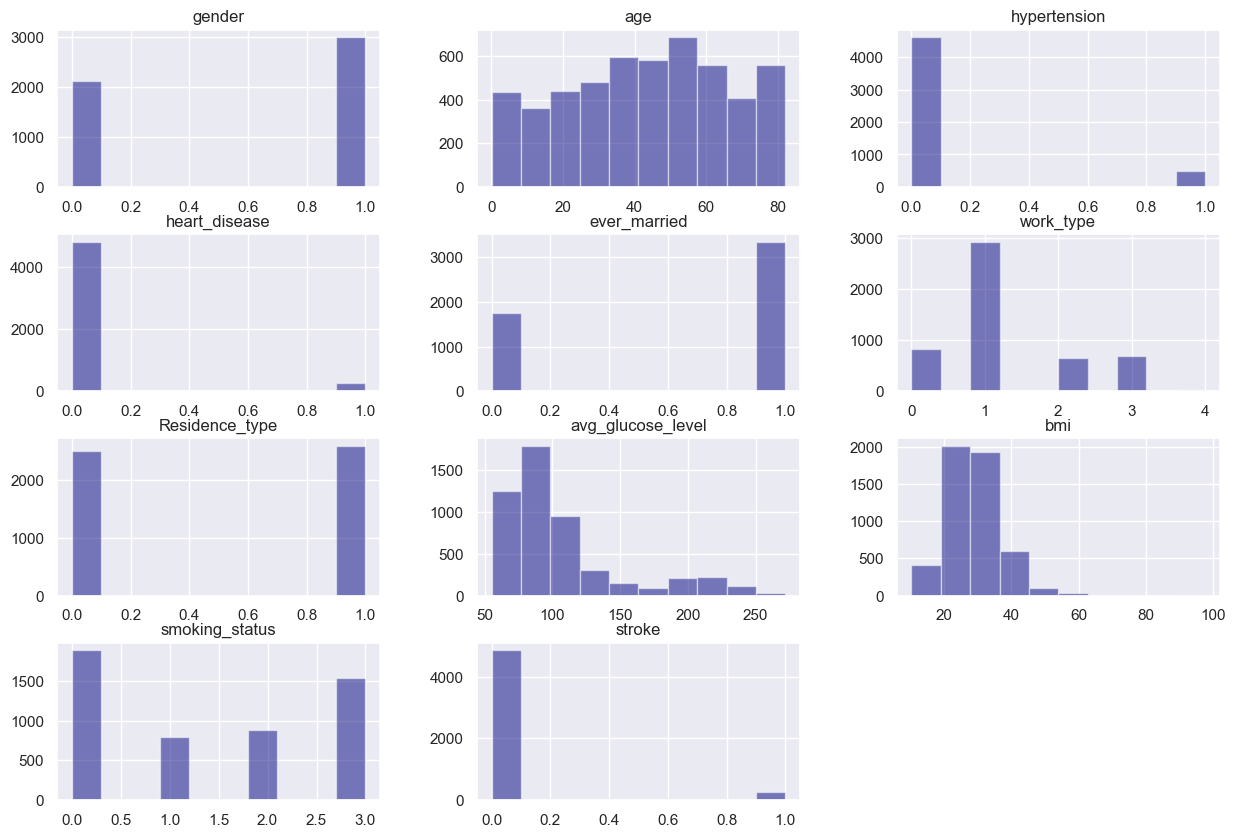

In [23]:
sns.set(style="darkgrid")
df2.hist(bins=10,figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()

### Development of Machine Learning Models

#### SMOTE  

In [24]:
from imblearn.over_sampling import SMOTE
x, y = df2.iloc[:, 0:-1], df2.iloc[:, -1:]

print("Before Oversampling, the counts of label 1: ", y.value_counts()[1])
print("Before Oversampling, the counts of label 0: ", y.value_counts()[0])

oversample = SMOTE()
x_train_res, y_train_res = oversample.fit_resample(x, y)

print("After Oversampling, the counts of label 1: ", y_train_res.value_counts()[1])
print("After Oversampling, the counts of label 0: ", y_train_res.value_counts()[0])

Before Oversampling, the counts of label 1:  249
Before Oversampling, the counts of label 0:  4860
After Oversampling, the counts of label 1:  4860
After Oversampling, the counts of label 0:  4860


#### Split Dataset 

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x_train_res, y_train_res, test_size=0.3, random_state=42)

#### Machine Learning 1: Random Forest 

In [46]:
# Train Random Forest
RF = RandomForestClassifier(n_jobs=-1, random_state=42)
RF_t0 = time.time()
RF.fit(x_train,y_train)
RF_t1 = time.time()
prediction_linear_RF = RF.predict(x_test)
RF_t2 = time.time()
RF_time_linear_train = RF_t1-RF_t0
RF_time_linear_predict = RF_t2-RF_t1

In [47]:
# Results of Random Forest
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
report_RF = classification_report(y_test, prediction_linear_RF, output_dict=True)
print('Stroke: ', report_RF['1.0'])
print('No Stroke: ', report_RF['0.0'])

Random Forest Accuracy: 97.02%
Stroke:  {'precision': 0.9921033740129217, 'recall': 0.9478737997256516, 'f1-score': 0.9694843914415995, 'support': 1458}
No Stroke:  {'precision': 0.9500984898227183, 'recall': 0.9924554183813443, 'f1-score': 0.9708151626970816, 'support': 1458}


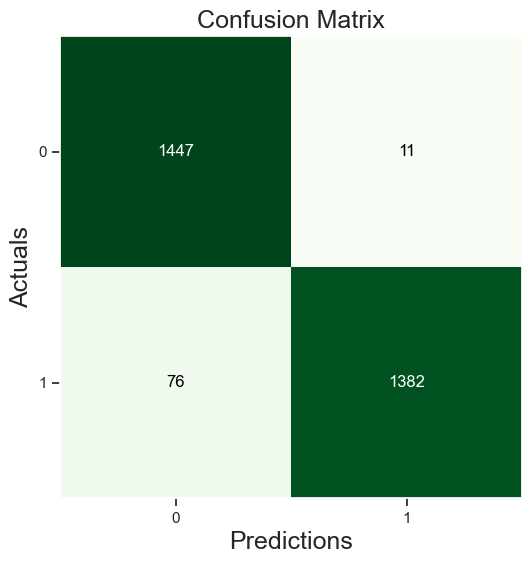

In [48]:
# Performance of Random Forest in Confusion Matrix
conf_matrix_RF = confusion_matrix(y_test, prediction_linear_RF)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_RF, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 2: Decision Tree 

In [49]:
# Training of Decision Tree
DT = DecisionTreeClassifier()
DT_t0 = time.time()
DT.fit(x_train,y_train)
DT_t1 = time.time()
prediction_linear_DT = DT.predict(x_test)
DT_t2 = time.time()
DT_time_linear_train = DT_t1-DT_t0
DT_time_linear_predict = DT_t2-DT_t1

In [50]:
# Results of Decision Tree
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
report_DT = classification_report(y_test, prediction_linear_DT, output_dict=True)
print('Stroke: ', report_DT['1.0'])
print('No Stroke: ', report_DT['0.0'])

Decision Tree Accuracy: 93.69%
Stroke:  {'precision': 0.9304054054054054, 'recall': 0.9444444444444444, 'f1-score': 0.9373723621511232, 'support': 1458}
No Stroke:  {'precision': 0.9435933147632312, 'recall': 0.9293552812071331, 'f1-score': 0.9364201796821009, 'support': 1458}


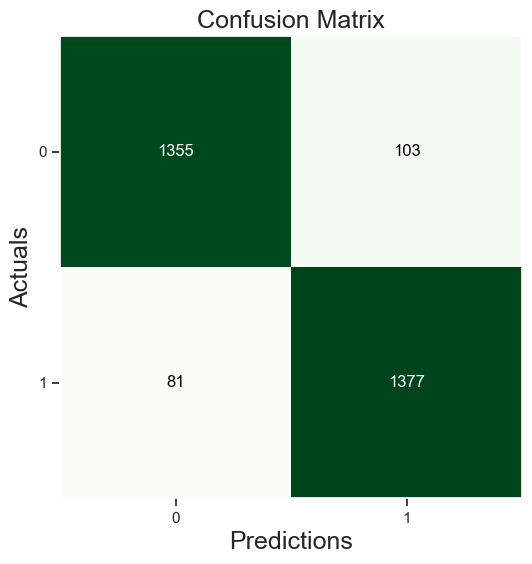

In [51]:
# Performance of Decision Tree in Confusion Matrix
conf_matrix_DT = confusion_matrix(y_test, prediction_linear_DT)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_DT, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 3: Support Vector Machine

In [52]:
#Training of Support Vector Machine
SVM = svm.SVC(kernel='linear', random_state=0)
SVM_t0 = time.time()
SVM.fit(x_train,y_train)
SVM_t1 = time.time()
prediction_linear_SVM = SVM.predict(x_test)
SVM_t2 = time.time()
SVM_time_linear_train = SVM_t1-SVM_t0
SVM_time_linear_predict = SVM_t2-SVM_t1

In [53]:
# Results of Support Vector Machine
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
report_SVM = classification_report(y_test, prediction_linear_SVM, output_dict=True)
print('Stroke: ', report_SVM['1.0'])
print('No Stroke: ', report_SVM['0.0'])

Support Vector Machine Accuracy: 77.71%
Stroke:  {'precision': 0.7556962025316456, 'recall': 0.8189300411522634, 'f1-score': 0.7860434496379198, 'support': 1458}
No Stroke:  {'precision': 0.8023952095808383, 'recall': 0.7352537722908093, 'f1-score': 0.7673586256263422, 'support': 1458}


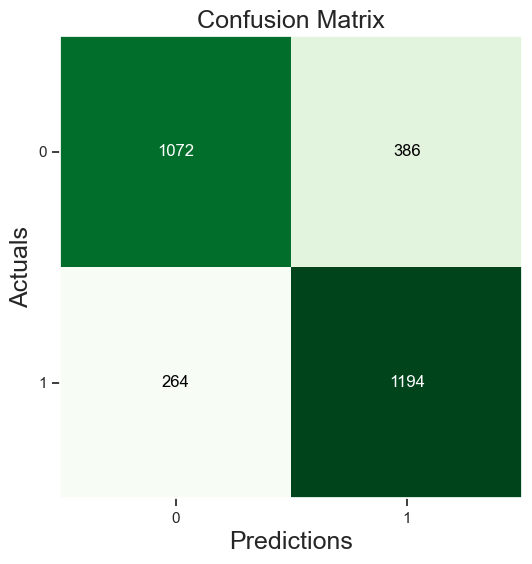

In [54]:
# Performance of Support Vector Machine in Confusion Matrix
conf_matrix_SVM = confusion_matrix(y_test, prediction_linear_SVM)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_SVM, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

#### Machine Learning 4: Naive Bayes

In [55]:
# Training of Naive Bayes
NB = GaussianNB()
NB_t0 = time.time()
NB.fit(x_train, y_train)
NB_t1 = time.time()
prediction_linear_NB = NB.predict(x_test)
NB_t2 = time.time()
NB_time_linear_train = NB_t1-NB_t0
NB_time_linear_predict = NB_t2-NB_t1

In [56]:
# Results of Naive Bayes
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
report_NB = classification_report(y_test, prediction_linear_NB, output_dict=True)
print('Stroke: ', report_NB['1.0'])
print('No Stroke: ', report_NB['0.0'])

Naive Bayes Accuracy: 77.91%
Stroke:  {'precision': 0.7451807228915662, 'recall': 0.8484224965706447, 'f1-score': 0.7934573444515715, 'support': 1458}
No Stroke:  {'precision': 0.8240445859872612, 'recall': 0.7098765432098766, 'f1-score': 0.7627118644067796, 'support': 1458}


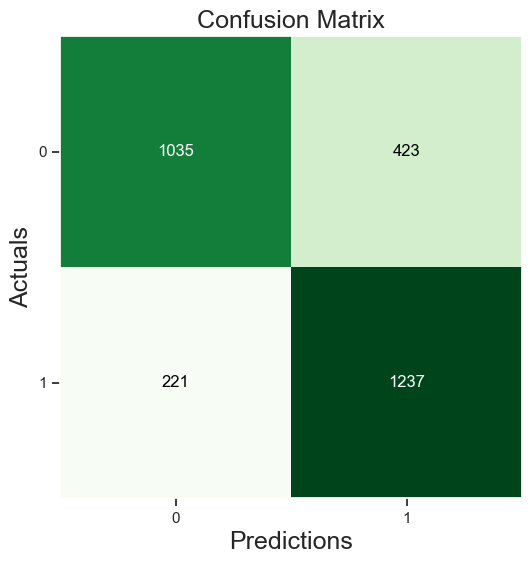

In [57]:
# Performance of Naive Bayes in Confusion Matrix
conf_matrix_NB = confusion_matrix(y_test, prediction_linear_NB)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix_NB, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Summary of all machine learning models 

In [58]:
print('---------------------------------------------------------------------------------------------------------------------')
print('Summary of all machine learning models (Stroke)')
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (RF_time_linear_train, RF_time_linear_predict))
print(f'Random Forest Accuracy: {round(RF.score(x_test, y_test)*100,2)}%')
print('Stroke: ', report_RF['1.0'])
print('No Stroke: ', report_RF['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (DT_time_linear_train, DT_time_linear_predict))
print(f'Decision Tree Accuracy: {round(DT.score(x_test, y_test)*100,2)}%')
print('Stroke: ', report_DT['1.0'])
print('No Stroke: ', report_DT['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (SVM_time_linear_train, SVM_time_linear_predict))
print(f'Support Vector Machine Accuracy: {round(SVM.score(x_test, y_test)*100,2)}%')
print('Stroke: ', report_SVM['1.0'])
print('No Stroke: ', report_SVM['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')
print("Training time: %fs; Prediction time: %fs" % (NB_time_linear_train, NB_time_linear_predict))
print(f'Naive Bayes Accuracy: {round(NB.score(x_test, y_test)*100,2)}%')
print('Stroke: ', report_NB['1.0'])
print('No Stroke: ', report_NB['0.0'])
print('---------------------------------------------------------------------------------------------------------------------')

---------------------------------------------------------------------------------------------------------------------
Summary of all machine learning models (Stroke)
---------------------------------------------------------------------------------------------------------------------
Training time: 0.625947s; Prediction time: 0.080562s
Random Forest Accuracy: 97.02%
Stroke:  {'precision': 0.9921033740129217, 'recall': 0.9478737997256516, 'f1-score': 0.9694843914415995, 'support': 1458}
No Stroke:  {'precision': 0.9500984898227183, 'recall': 0.9924554183813443, 'f1-score': 0.9708151626970816, 'support': 1458}
---------------------------------------------------------------------------------------------------------------------
Training time: 0.064720s; Prediction time: 0.002563s
Decision Tree Accuracy: 93.69%
Stroke:  {'precision': 0.9304054054054054, 'recall': 0.9444444444444444, 'f1-score': 0.9373723621511232, 'support': 1458}
No Stroke:  {'precision': 0.9435933147632312, 'recall': 0.929

### Export the best machine learning into a file 

In [39]:
import pickle
# Saving model to current directory
# Pickle serializes objects so they can be saved to a file, and loaded in a program again later on.
pickle.dump(RF, open('Random_Forest_Stroke_Prediction.pkl','wb'))